In [26]:
% matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [122]:
def periodic_convolve(x, k):
    """Returns a the convolution of periodic signal x with k assuming len(k) < len(x) / 2."""
    # CHECK THAT len(k) < len(x) / 2, if not, throw exception.
    N = len(x)
    M = len(k) / 2
    # Pad the periodic signal with half a kernel-length on each side
    y = np.r_[x[-np.ceil(M):], x, x[:np.floor(M)]]
    y = np.convolve(y, k, "valid")
    return y

/Users/yan/.miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


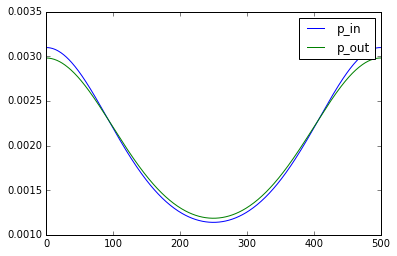

In [123]:
N = 500

t = np.linspace(0, np.pi, N)
# USE VON MISES
p_in = np.exp(-np.cos(t-np.pi/2) ** 2)
p_in = p_in / np.sum(p_in)

drift_rate = 0.2
w = N * (drift_rate / np.pi)
wint  = np.floor(w).astype(np.int)
wfrac = w - np.floor(w)
k = np.zeros(2*wint + 3)
k[0] = 0.5*wfrac
k[1] = 0.5*(1-wfrac)
k[-1] = 0.5*(wfrac)
k[-2] = 0.5*(1-wfrac)

p_out = periodic_convolve(p_in, k)

plt.plot(p_in, label="p_in")
plt.plot(p_out, label="p_out")
plt.legend()